<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Assignment2/FastaiImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating our own dataset from Google images [Airplane,Rockets, bus, car, boat, bike, train] - 7 classes

In [0]:
#Any changes to the libraries are reloaded here automatically #Add these 3 lines in all the code
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.basics import *
from fastai.metrics import error_rate

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# folder ='airplane'
path = Path('/content/gdrive/My Drive/Deep_Learning/DL_dataset')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

data = (ImageList.from_folder(path) .random_split_by_pct() .label_from_folder() .transform(get_transforms(), size=224) .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


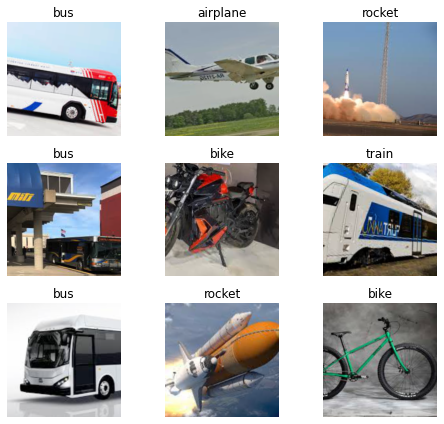

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.200365,0.226930,0.064732,09:32
1,0.660642,0.244494,0.071429,00:24
2,0.450607,0.213060,0.055804,00:24
3,0.339610,0.211734,0.055804,00:23


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [0]:
data.classes

['airplane', 'bike', 'boat', 'bus', 'car', 'rocket', 'train']

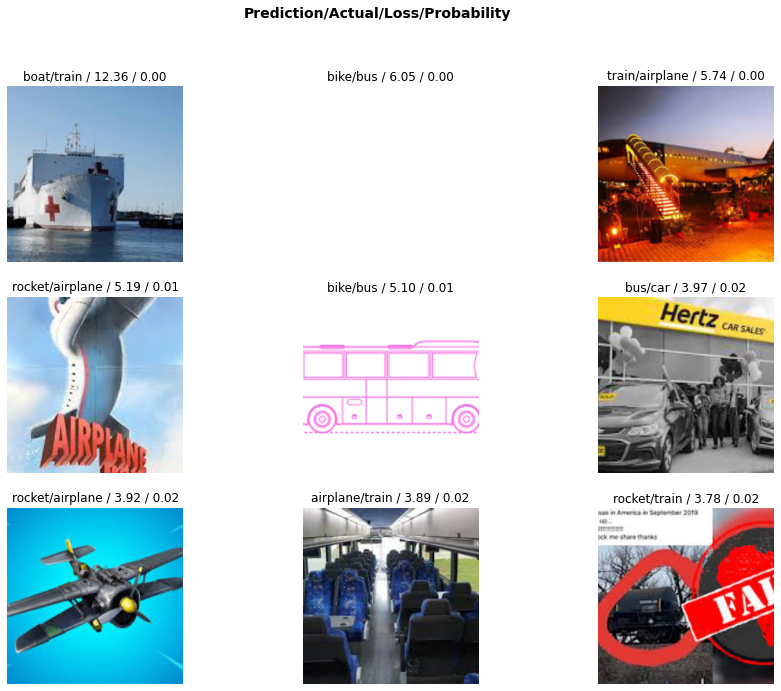

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

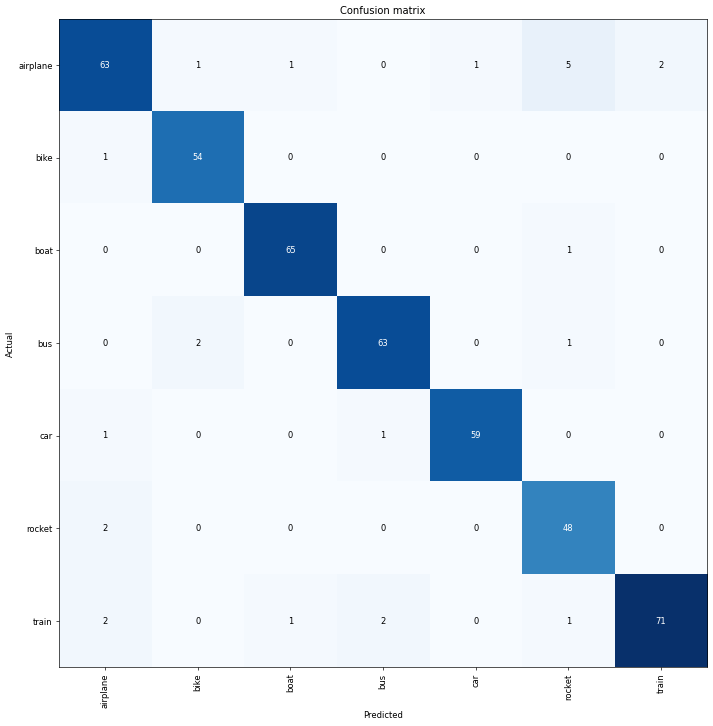

In [0]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:

interp.most_confused(min_val=2)

[('airplane', 'rocket', 5),
 ('airplane', 'train', 2),
 ('bus', 'bike', 2),
 ('rocket', 'airplane', 2),
 ('train', 'airplane', 2),
 ('train', 'bus', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.383366,0.335406,0.080357,00:25


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


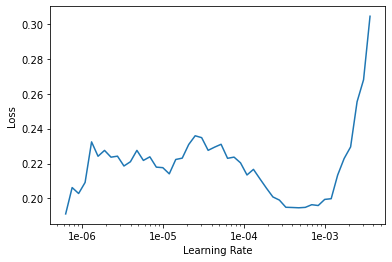

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.199301,0.198571,0.058036,00:24
1,0.192305,0.197569,0.058036,00:25


In [0]:

learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


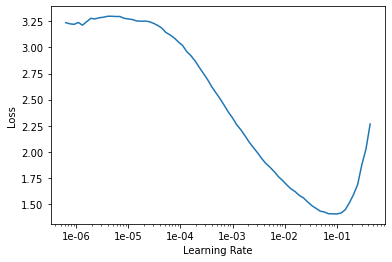

In [0]:

learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.964584,0.238274,0.069196,00:27
1,0.554591,0.287186,0.075893,00:27
2,0.390625,0.251120,0.073661,00:27
3,0.333055,0.194481,0.060268,00:26
4,0.257169,0.195424,0.064732,00:27
5,0.196964,0.179519,0.062500,00:27
6,0.149445,0.154674,0.058036,00:27
7,0.119906,0.155705,0.053571,00:27
8,0.103810,0.141645,0.055804,00:27
9,0.089683,0.143722,0.051339,00:27


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.079031,0.141220,0.053571,00:29
1,0.078811,0.137486,0.053571,00:29
2,0.063375,0.138019,0.049107,00:29


In [0]:
learn.load('stage-1-50');

In [0]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

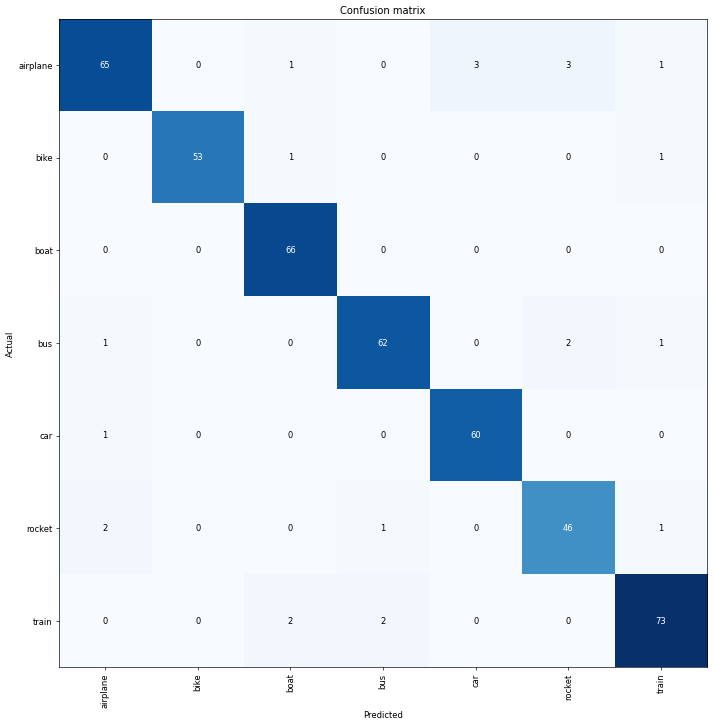

In [0]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

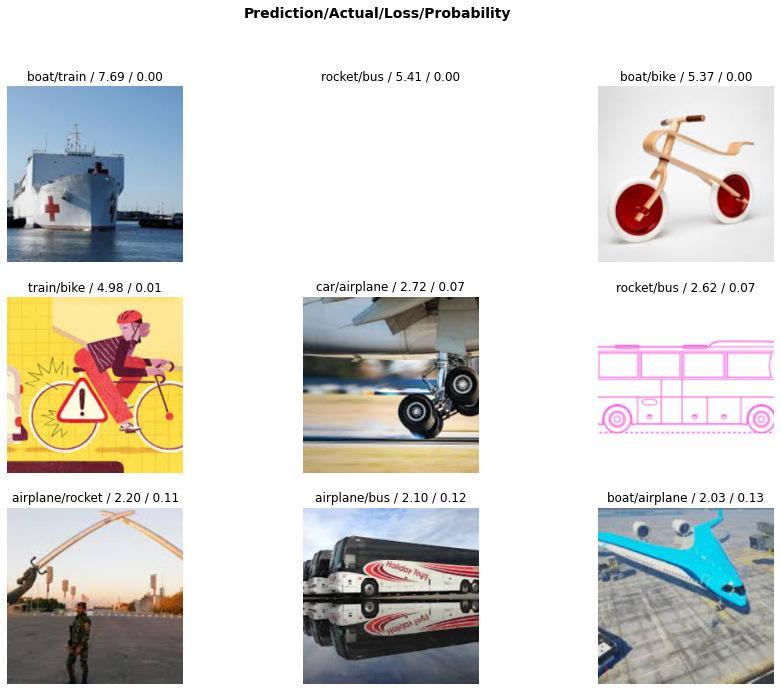

In [0]:
interp.plot_top_losses(9, figsize=(15,11))